### Week4 授業前課題1 アヤメの分類

まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。


この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。

練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


・virgicolorとvirginica

・sepal_lengthとpetal_length

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [141]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.DataFrame(iris.target,columns=["Species"])
Xy = pd.concat([X,y],axis=1)
Xy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [155]:
#・virgicolor=1とvirginica=2,sepal_lengthとpetal_lengthを抜き出す。
pd.set_option('display.max_rows', 150)
Xy = Xy.loc[:,["sepal length (cm)","petal length (cm)","Species"]]
Xy_1 = Xy[Xy["Species"].isin(['1', '2'])]   # Xy_1 = Xy.query("Species== ['1', '2']")でも良い
Xy_1

,sepal length (cm),petal length (cm),Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


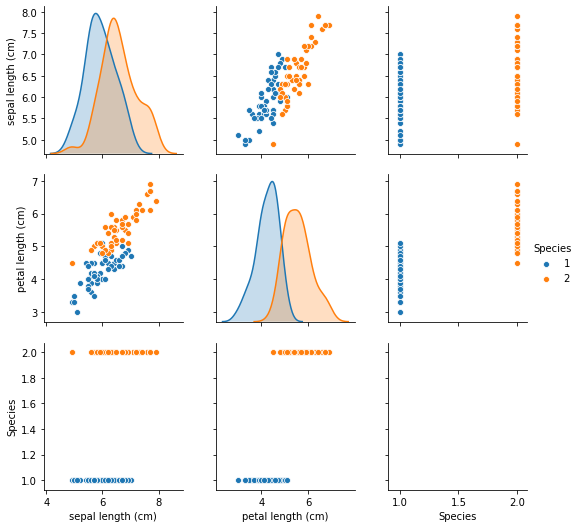

In [67]:
sns.pairplot(Xy_1,hue='Species')

(3, 9)

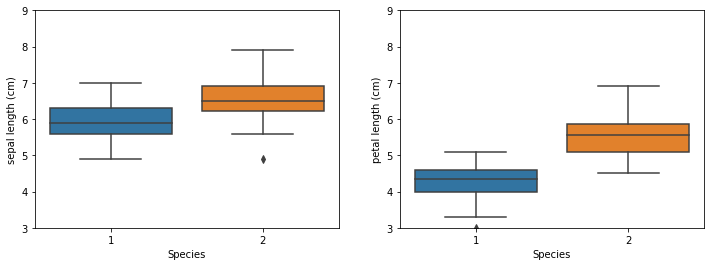

In [68]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.boxplot(x='Species',y="sepal length (cm)",data=Xy_1)
plt.ylim(3,9)
plt.subplot(1,2,2)
sns.boxplot(x='Species',y="petal length (cm)",data=Xy_1)
plt.ylim(3,9)

(3, 9)

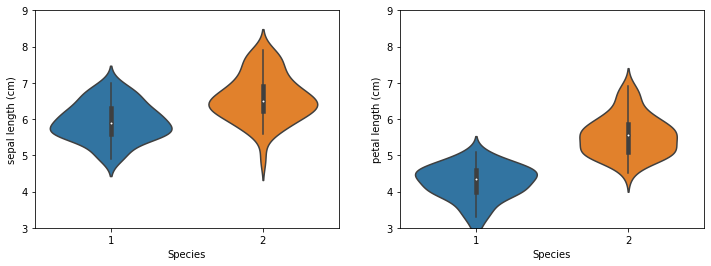

In [69]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.ylim(3,9)
sns.violinplot(x='Species',y="sepal length (cm)",data=Xy_1)
plt.subplot(1,2,2)
sns.violinplot(x='Species',y="petal length (cm)",data=Xy_1)
plt.ylim(3,9)

《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

### 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

《注意点》

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

《分割する理由》

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [159]:
# valuseでdarrayに戻す
X = Xy_1.loc[:,["sepal length (cm)","petal length (cm)"]].values
y = Xy_1.loc[:,['Species']].values
print(X)
print(y)

[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.  3.3]
 [5.6 4.2]
 [5.7 4.2]
 [5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 [6.  5. ]
 [6.9 5.7]
 [5.6 4.9]
 [7.7 6.7]
 [6.3 4.9]
 [6.7 5.7]
 [7.2 6. ]
 [6.2 4.8]
 [6.1 4.9]
 [6.4 5.6]
 [7.2 5.8]
 [7.4 6.1]
 [7.9 6.4]
 [6.4 5.6]
 [6.3 5.1]
 [6.1 5.6]
 [7.7 6.1]
 [6.3 5.6]
 [6.4 5.5]
 [6.  4.8]
 [6.9 5.4]
 [6.7 5.6]

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [161]:
print("-----X_train-----")
print(X_train)
print("-----X_test-----")
print(X_test)
print("-----y_train-----")
print(y_train)
print("-----y_test-----")
print(y_test)

-----X_train-----
[[7.2 6. ]
 [6.3 5.1]
 [6.3 5.6]
 [6.6 4.4]
 [6.7 5. ]
 [6.8 5.9]
 [5.8 5.1]
 [5.6 4.1]
 [5.7 4.5]
 [7.7 6.1]
 [5.9 4.8]
 [6.3 5.6]
 [5.6 3.6]
 [6.2 4.8]
 [5.8 5.1]
 [5.8 4. ]
 [6.  4.5]
 [7.7 6.7]
 [6.4 5.5]
 [5.9 4.2]
 [6.  5.1]
 [6.3 5. ]
 [7.4 6.1]
 [6.  4.8]
 [6.8 5.5]
 [5.7 4.2]
 [5.5 4. ]
 [5.  3.5]
 [6.3 4.9]
 [6.4 4.5]
 [5.5 4.4]
 [6.5 5.2]
 [6.4 5.6]
 [6.9 5.4]
 [7.1 5.9]
 [5.7 3.5]
 [5.9 5.1]
 [4.9 4.5]
 [5.  3.3]
 [6.8 4.8]
 [6.9 5.1]
 [5.6 4.2]
 [6.2 4.5]
 [6.  4.5]
 [5.4 4.5]
 [6.3 4.9]
 [6.1 5.6]
 [6.1 4.9]
 [6.7 5.2]
 [5.5 3.7]
 [4.9 3.3]
 [5.2 3.9]
 [7.  4.7]
 [7.2 6.1]
 [6.5 5.5]
 [6.6 4.6]
 [5.1 3. ]
 [5.8 3.9]
 [7.9 6.4]
 [5.8 4.1]
 [7.7 6.7]
 [6.4 5.3]
 [5.6 4.5]
 [6.3 6. ]
 [5.7 5. ]
 [6.3 4.7]
 [6.4 5.3]
 [5.6 4.9]
 [6.1 4.7]
 [6.4 5.6]
 [6.7 5.6]
 [6.9 4.9]
 [6.5 4.6]
 [7.3 6.3]
 [6.1 4.7]]
-----X_test-----
[[6.4 4.3]
 [6.7 5.7]
 [6.7 5.8]
 [5.5 4. ]
 [6.  5. ]
 [6.1 4.6]
 [6.5 5.1]
 [6.7 4.7]
 [6.1 4. ]
 [7.2 5.8]
 [5.7 4.1]
 [5.7 4.2]
 [6.2 4

### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

《注意点》


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。


《実際の問題での前処理は？》


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [149]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(X_train)
X_train_scalered = sscaler.transform(X_train)
X_test_scalered = sscaler.transform(X_test)

In [74]:
np.set_printoptions(precision=2)
print("-----X_train_scalered-----")
print(X_train_scalered)
print("-----X_test_scalered-----")
print(X_test_scalered)#nparrayは左記で小数点桁数を指定できる。ちなみにデータフレーム（pandas）はpd.options.display.float_format = '{:.2f}'.format　で指定。

-----X_train_scalered-----
[[ 0.83 -0.04]
 [-0.23  0.08]
 [-1.9  -1.63]
 [ 1.44  1.18]
 [-2.05 -0.41]
 [-0.38 -0.04]
 [-1.14 -1.38]
 [ 0.68  1.06]
 [-0.23 -0.16]
 [ 0.22 -0.41]
 [-0.99 -0.77]
 [ 0.07  0.93]
 [ 0.98  0.08]
 [-0.69 -1.14]
 [-0.99  0.08]
 [ 0.22  0.57]
 [-0.53 -0.77]
 [-0.53 -0.04]
 [ 2.19  2.52]
 [-1.9  -1.87]
 [ 0.68  1.06]
 [-0.69  0.32]
 [ 2.19  1.54]
 [-0.23 -0.16]
 [ 1.59  1.79]
 [ 0.68 -0.16]
 [ 1.44  1.54]
 [-0.69 -0.9 ]
 [ 0.68 -0.53]
 [ 0.22  0.93]
 [-0.08 -0.65]
 [ 1.44  1.42]
 [ 0.38  0.32]
 [-1.14 -1.02]
 [ 0.22 -0.65]
 [-1.75 -2.24]
 [-0.99 -0.9 ]
 [ 0.98  0.32]
 [ 0.98  1.06]
 [ 1.74  1.54]
 [-1.59 -1.14]
 [ 1.13 -0.16]
 [-0.84 -0.9 ]
 [ 0.22  0.57]
 [-0.84 -1.63]
 [-0.84 -0.77]
 [-2.05 -1.87]
 [-0.38 -1.02]
 [-1.14 -0.53]
 [-0.99 -1.14]
 [-0.08 -0.41]
 [ 0.53 -0.29]
 [ 0.07  0.2 ]
 [ 0.53 -0.53]
 [-0.38  0.2 ]
 [-0.38 -0.41]
 [ 0.68  1.18]
 [ 2.19  2.28]
 [ 0.83  1.3 ]
 [ 0.68  0.2 ]
 [ 0.07  0.08]
 [ 1.29  1.3 ]
 [-0.23 -0.29]
 [-0.38  0.32]
 [-0.99 -1.51

### 問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

### 最近傍法（k-nearest neighbors, k-nn）

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model_1_nn = KNeighborsClassifier(n_neighbors=1)
model_3_nn = KNeighborsClassifier(n_neighbors=3)
model_5_nn = KNeighborsClassifier(n_neighbors=5)

model_1_nn.fit(X_train_scalered,y_train)
model_3_nn.fit(X_train_scalered,y_train)
model_5_nn.fit(X_train_scalered,y_train)

predicted_label_1_nn = model_1_nn.predict(X_test_scalered)
predicted_label_3_nn = model_3_nn.predict(X_test_scalered)
predicted_label_5_nn = model_5_nn.predict(X_test_scalered)

print(predicted_label_1_nn)
print(predicted_label_3_nn)
print(predicted_label_5_nn)

[2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]
[2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]
[2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


・scikit-learnを使い4種類の指標を計算する

・混同行列をscikit-learnを使い表示する

・4種類の指標値の意味について簡単に調査して文章でまとめる

In [190]:
from sklearn.metrics import accuracy_score #Accuracy（正解率)
from sklearn.metrics import precision_score #Precision（適合率）
from sklearn.metrics import recall_score  #Recall（再現率）
from sklearn.metrics import f1_score  #F値 
from sklearn.metrics import confusion_matrix # 混同行列（confusion matrix）

In [88]:
def evaluate(predicted_label):
    accuracy = accuracy_score(y_test, predicted_label)
    precision = precision_score(y_test, predicted_label)
    recall = recall_score(y_test, predicted_label)
    f1 = f1_score(y_test, predicted_label)
    confusion = confusion_matrix(y_test, predicted_label)
    print("--------------------------")
    print("Accuracy（正解率):\n{}".format(accuracy))
    print("Precision（適合率）:\n{}".format(precision))
    print("Recall（再現率）:\n{}".format(recall))
    print("F値:\n{}".format(f1))
    print("混同行列（confusion matrix）:\n{}".format(confusion))
    print("--------------------------")
    
evaluate(predicted_label_1_nn)
evaluate(predicted_label_3_nn)
evaluate(predicted_label_5_nn)

--------------------------
Accuracy（正解率):
0.88
Precision（適合率）:
0.8888888888888888
Recall（再現率）:
0.8
F値:
0.8421052631578948
混同行列（confusion matrix）:
[[ 8  2]
 [ 1 14]]
--------------------------
--------------------------
Accuracy（正解率):
0.92
Precision（適合率）:
0.9
Recall（再現率）:
0.9
F値:
0.9
混同行列（confusion matrix）:
[[ 9  1]
 [ 1 14]]
--------------------------
--------------------------
Accuracy（正解率):
0.96
Precision（適合率）:
1.0
Recall（再現率）:
0.9
F値:
0.9473684210526316
混同行列（confusion matrix）:
[[ 9  1]
 [ 0 15]]
--------------------------


In [112]:
accuracy = accuracy_score(y_test, predicted_label_5_nn)
precision = precision_score(y_test, predicted_label_5_nn)
recall = recall_score(y_test, predicted_label_5_nn)
f1 = f1_score(y_test, predicted_label_5_nn)

ここでは2値分類であるため、「virginicaであるかどうかを判定する問題」と捉えると、virginicaを **Positive（陽性）** 、versicolorを **Negative（陰性）** と呼ぶことになります。scikit-learnで出力した混同行列では、左上がTrue Negative(TN)、右上がFalse Positive(FP)、左下がFalse Negative(FN)、右下がTrue Positive(TP)と呼ぶことになります。

そのように定義した場合、各指標値は以下の計算式で求まります。



Accuracy（正解率）は「全ての中で正解した割合」　$\frac{TP+TN}{TP+TN+FP+FN}$

Precision（適合率）は「Positiveだと判定された中で実際にPositiveな割合」　$\frac{TP}{TP+FP}$

Recall（再現率）は「実際にはPositiveなものの中でPositiveだと判定された割合」　$\frac{TP}{TP+FN}$

F1は「PrecisionとRecallの調和平均」　 $2\times\frac{Precision*Recall}{Precision+Recall}$


### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [90]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [100]:
y_train = y_train.reshape(75,)

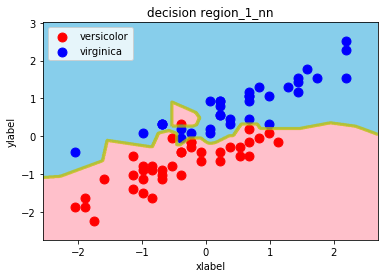

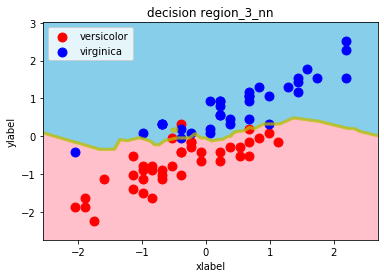

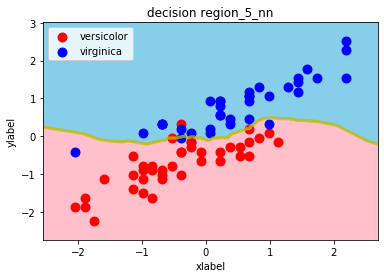

In [102]:
decision_region(X_train_scalered, y_train, model_1_nn, step=0.01, title='decision region_1_nn', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train_scalered, y_train, model_3_nn, step=0.01, title='decision region_3_nn', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train_scalered, y_train, model_5_nn, step=0.01, title='decision region_5_nn', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])


### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


・最近傍法

・ロジスティック回帰

・SVM

・決定木

・ランダムフォレスト

《実際の問題では？》


ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。# 評価として決定係数を表示

### ロジスティック回帰

In [103]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_scalered,y_train)
predicted_label_LR = LR.predict(X_test_scalered)
print(predicted_label_LR)
LR.score(X_test_scalered,y_test)

[2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.92

In [114]:
accuracy_LR = accuracy_score(y_test, predicted_label_LR)
precision_LR = precision_score(y_test, predicted_label_LR)
recall_LR = recall_score(y_test, predicted_label_LR)
f1_LR = f1_score(y_test, predicted_label_LR)
confusion_matrix_LR = confusion_matrix(y_test, predicted_label_LR)

print("Accuracy（正解率):{}".format(accuracy_LR))
print("Precision（適合率）:{}".format(precision_LR))
print("Recall（再現率）:{}".format(recall_LR))
print("F値 :{}".format(f1_LR))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_LR))

Accuracy（正解率):0.92
Precision（適合率）:0.9
Recall（再現率）:0.9
F値 :0.9
混同行列（confusion matrix）:[[ 9  1]
 [ 1 14]]


### SVM (分類はSVC)

In [105]:
from sklearn.svm import SVC

# クラス分類問題において、データの数がそこまで大きくない場合はSVC(Linear SVM)を使います。
svc = SVC() 

svc.fit(X_train_scalered,y_train)
predicted_label_svc = svc.predict(X_test_scalered)
print(predicted_label_svc)
print(svc.score(X_test_scalered, y_test))

[2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]
0.92


In [115]:
accuracy_svc = accuracy_score(y_test, predicted_label_svc)
precision_svc = precision_score(y_test, predicted_label_svc)
recall_svc = recall_score(y_test, predicted_label_svc)
f1_svc = f1_score(y_test, predicted_label_svc)
confusion_matrix_svc = confusion_matrix(y_test, predicted_label_svc)

print("Accuracy（正解率):{}".format(accuracy_svc))
print("Precision（適合率）:{}".format(precision_svc))
print("Recall（再現率）:{}".format(recall_svc))
print("F値 :{}".format(f1_svc))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_svc))

Accuracy（正解率):0.92
Precision（適合率）:0.9
Recall（再現率）:0.9
F値 :0.9
混同行列（confusion matrix）:[[ 9  1]
 [ 1 14]]


### 決定木

In [107]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scalered,y_train)
predicted_label_tree_clf = tree_clf.predict(X_test_scalered)
print(predicted_label_tree_clf)
print(tree_clf.score(X_test_scalered, y_test))

[2 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]
0.92


In [117]:
accuracy_tree_clf = accuracy_score(y_test, predicted_label_tree_clf)
precision_tree_clf = precision_score(y_test, predicted_label_tree_clf)
recall_tree_clf = recall_score(y_test, predicted_label_tree_clf)
f1_tree_clf = f1_score(y_test, predicted_label_tree_clf)
confusion_matrix_tree_clf = confusion_matrix(y_test, predicted_label_tree_clf)

print("Accuracy（正解率):{}".format(accuracy_tree_clf))
print("Precision（適合率）:{}".format(precision_tree_clf))
print("Recall（再現率）:{}".format(recall_tree_clf))
print("F値 :{}".format(f1_tree_clf))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_tree_clf))

Accuracy（正解率):0.92
Precision（適合率）:0.9
Recall（再現率）:0.9
F値 :0.9
混同行列（confusion matrix）:[[ 9  1]
 [ 1 14]]


### ランダムフォレスト

In [109]:
from sklearn.ensemble import RandomForestClassifier
RFC_clf = RandomForestClassifier()
RFC_clf.fit(X_train_scalered,y_train)
predicted_label_RFC_clf = RFC_clf.predict(X_test_scalered)
print(predicted_label_RFC_clf)
print(RFC_clf.score(X_test_scalered, y_test))

[2 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 1 1]
0.92


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [118]:
accuracy_RFC_clf = accuracy_score(y_test, predicted_label_RFC_clf)
precision_RFC_clf = precision_score(y_test, predicted_label_RFC_clf)
recall_RFC_clf = recall_score(y_test, predicted_label_RFC_clf)
f1_RFC_clf = f1_score(y_test, predicted_label_RFC_clf)
confusion_matrix_RFC_clf = confusion_matrix(y_test, predicted_label_RFC_clf)

print("Accuracy（正解率):{}".format(accuracy_RFC_clf))
print("Precision（適合率）:{}".format(precision_RFC_clf))
print("Recall（再現率）:{}".format(recall_RFC_clf))
print("F値 :{}".format(f1_RFC_clf))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_RFC_clf))

Accuracy（正解率):0.92
Precision（適合率）:0.9
Recall（再現率）:0.9
F値 :0.9
混同行列（confusion matrix）:[[ 9  1]
 [ 1 14]]


In [120]:
#各評価値をまとめる（標準化あり）
pd.DataFrame({"k近傍法":[accuracy,precision,recall,f1],"LR":[accuracy_LR,precision_LR,recall_LR,f1_LR],"svc":[accuracy_svc,precision_svc,recall_svc,f1_svc],"決定木":[accuracy_tree_clf,precision_tree_clf,recall_tree_clf,f1_tree_clf],"ランダムフォレスト":[accuracy_RFC_clf,precision_RFC_clf,recall_RFC_clf,f1_RFC_clf]},
index=["Accuracy（正解率)","Precision（適合率)","Recall（再現率）","F値"])

,k近傍法,LR,svc,決定木,ランダムフォレスト
Accuracy（正解率),0.960000,0.92,0.92,0.92,0.92
Precision（適合率),1.000000,0.90,0.90,0.90,0.90
Recall（再現率）,0.900000,0.90,0.90,0.90,0.90
F値,0.947368,0.90,0.90,0.90,0.90


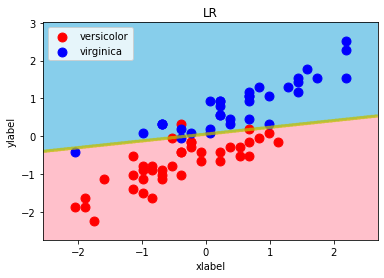

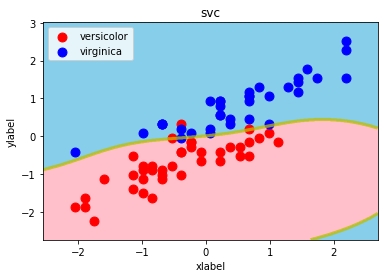

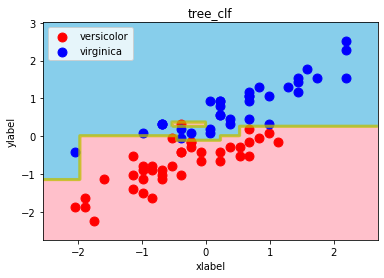

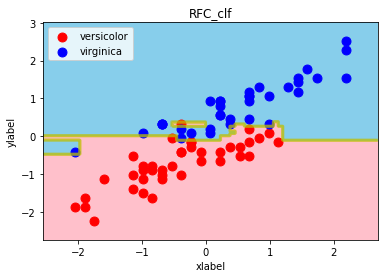

In [121]:
decision_region(X_train_scalered, y_train, LR, step=0.01, title='LR', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train_scalered, y_train, svc, step=0.01, title='svc', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train_scalered, y_train, tree_clf, step=0.01, title='tree_clf', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train_scalered, y_train, RFC_clf, step=0.01, title='RFC_clf', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

### 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

### 最近傍法(標準化なし)

In [164]:
model_1_nn_no_scalered = KNeighborsClassifier(n_neighbors=1)
model_3_nn_no_scalered = KNeighborsClassifier(n_neighbors=3)
model_5_nn_no_scalered = KNeighborsClassifier(n_neighbors=5)

model_1_nn_no_scalered.fit(X_train,y_train)
model_3_nn_no_scalered.fit(X_train,y_train)
model_5_nn_no_scalered.fit(X_train,y_train)

predicted_label_1_nn_no_scalered = model_1_nn_no_scalered.predict(X_test)
predicted_label_3_nn_no_scalered = model_3_nn_no_scalered.predict(X_test)
predicted_label_5_nn_no_scalered = model_5_nn_no_scalered.predict(X_test)

print(predicted_label_1_nn_no_scalered)
print(predicted_label_3_nn_no_scalered)
print(predicted_label_5_nn_no_scalered)

[1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]
[1 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]
[1 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [166]:
def evaluate(predicted_label):
    accuracy = accuracy_score(y_test, predicted_label)
    precision = precision_score(y_test, predicted_label)
    recall = recall_score(y_test, predicted_label)
    f1 = f1_score(y_test, predicted_label)
    confusion = confusion_matrix(y_test, predicted_label)
    print("--------------------------")
    print("Accuracy（正解率):\n{}".format(accuracy))
    print("Precision（適合率）:\n{}".format(precision))
    print("Recall（再現率）:\n{}".format(recall))
    print("F値:\n{}".format(f1))
    print("混同行列（confusion matrix）:\n{}".format(confusion))
    print("--------------------------")
    

In [191]:
#評価関数呼び出し
evaluate(predicted_label_1_nn_no_scalered)
evaluate(predicted_label_3_nn_no_scalered)
evaluate(predicted_label_5_nn_no_scalered)

--------------------------
Accuracy（正解率):
0.96
Precision（適合率）:
0.9285714285714286
Recall（再現率）:
1.0
F値:
0.962962962962963
混同行列（confusion matrix）:
[[13  0]
 [ 1 11]]
--------------------------
--------------------------
Accuracy（正解率):
1.0
Precision（適合率）:
1.0
Recall（再現率）:
1.0
F値:
1.0
混同行列（confusion matrix）:
[[13  0]
 [ 0 12]]
--------------------------
--------------------------
Accuracy（正解率):
1.0
Precision（適合率）:
1.0
Recall（再現率）:
1.0
F値:
1.0
混同行列（confusion matrix）:
[[13  0]
 [ 0 12]]
--------------------------


In [205]:
accuracy_5_nn_no_scalered = accuracy_score(y_test, predicted_label_5_nn_no_scalered)
precision_5_nn_no_scalered = precision_score(y_test, predicted_label_5_nn_no_scalered)
recall_5_nn_no_scalered = recall_score(y_test, predicted_label_5_nn_no_scalered)
f1_5_nn_no_scalered = f1_score(y_test, predicted_label_5_nn_no_scalered)
confusion_matrix_5_nn_no_scalered = confusion_matrix(y_test, predicted_label_5_nn_no_scalered)

print("Accuracy（正解率):{}".format(accuracy_5_nn_no_scalered))
print("Precision（適合率）:{}".format(precision_5_nn_no_scalered))
print("Recall（再現率）:{}".format(recall_5_nn_no_scalered))
print("F値 :{}".format(f1_5_nn_no_scalered))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_5_nn_no_scalered))

Accuracy（正解率):1.0
Precision（適合率）:1.0
Recall（再現率）:1.0
F値 :1.0
混同行列（confusion matrix）:[[13  0]
 [ 0 12]]


In [176]:
y_train = y_train.reshape(75,)

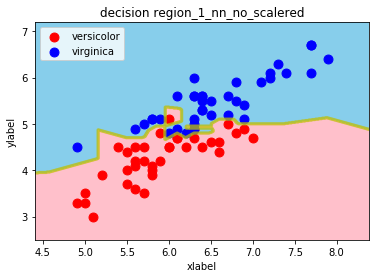

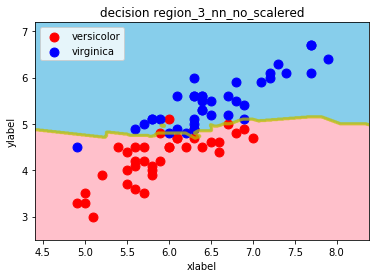

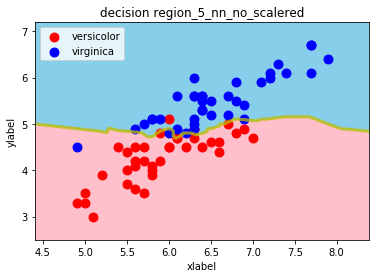

In [192]:
decision_region(X_train, y_train, model_1_nn_no_scalered, step=0.01, title='decision region_1_nn_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train, y_train, model_3_nn_no_scalered, step=0.01, title='decision region_3_nn_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train, y_train, model_5_nn_no_scalered, step=0.01, title='decision region_5_nn_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

### ロジスティック回帰（標準化なし）

In [193]:
from sklearn.linear_model import LogisticRegression
LR_no_scalered = LogisticRegression()
LR_no_scalered.fit(X_train,y_train)
predicted_label_LR_no_scalered = LR_no_scalered.predict(X_test)
print(predicted_label_LR_no_scalered)

[1 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [194]:
accuracy_LR_no_scalered = accuracy_score(y_test, predicted_label_LR_no_scalered)
precision_LR_no_scalered = precision_score(y_test, predicted_label_LR_no_scalered)
recall_LR_no_scalered = recall_score(y_test, predicted_label_LR_no_scalered)
f1_LR_no_scalered = f1_score(y_test, predicted_label_LR_no_scalered)
confusion_matrix_LR_no_scalered = confusion_matrix(y_test, predicted_label_LR_no_scalered)

print("Accuracy（正解率):{}".format(accuracy_LR_no_scalered))
print("Precision（適合率）:{}".format(precision_LR_no_scalered))
print("Recall（再現率）:{}".format(recall_LR_no_scalered))
print("F値 :{}".format(f1_LR_no_scalered))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_LR_no_scalered))

Accuracy（正解率):1.0
Precision（適合率）:1.0
Recall（再現率）:1.0
F値 :1.0
混同行列（confusion matrix）:[[13  0]
 [ 0 12]]


### SVM(標準化なし)

In [195]:
svc_no_scalered = SVC() 

svc_no_scalered.fit(X_train,y_train)
predicted_label_svc_no_scalered = svc.predict(X_test)
print(predicted_label_svc_no_scalered)

[1 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [196]:
accuracy_svc_no_scalered = accuracy_score(y_test, predicted_label_svc_no_scalered)
precision_svc_no_scalered = precision_score(y_test, predicted_label_svc_no_scalered)
recall_svc_no_scalered = recall_score(y_test, predicted_label_svc_no_scalered)
f1_svc_no_scalered = f1_score(y_test, predicted_label_svc_no_scalered)
confusion_matrix_svc_no_scalered = confusion_matrix(y_test, predicted_label_svc_no_scalered)

print("Accuracy（正解率):{}".format(accuracy_svc_no_scalered))
print("Precision（適合率）:{}".format(precision_svc_no_scalered))
print("Recall（再現率）:{}".format(recall_svc_no_scalered))
print("F値 :{}".format(f1_svc_no_scalered))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_svc_no_scalered))

Accuracy（正解率):1.0
Precision（適合率）:1.0
Recall（再現率）:1.0
F値 :1.0
混同行列（confusion matrix）:[[13  0]
 [ 0 12]]


### 決定木（標準化なし）

In [201]:
tree_clf_no_scalered = DecisionTreeClassifier()
tree_clf_no_scalered.fit(X_train,y_train)
predicted_label_tree_clf_no_scalered = tree_clf_no_scalered.predict(X_test)
print(predicted_label_tree_clf_no_scalered)

[1 2 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]


In [202]:
accuracy_tree_clf_no_scalered = accuracy_score(y_test, predicted_label_tree_clf_no_scalered)
precision_tree_clf_no_scalered = precision_score(y_test, predicted_label_tree_clf_no_scalered)
recall_tree_clf_no_scalered = recall_score(y_test, predicted_label_tree_clf_no_scalered)
f1_tree_clf_no_scalered = f1_score(y_test, predicted_label_tree_clf_no_scalered)
confusion_matrix_tree_clf_no_scalered = confusion_matrix(y_test, predicted_label_tree_clf_no_scalered)

print("Accuracy（正解率):{}".format(accuracy_tree_clf_no_scalered))
print("Precision（適合率）:{}".format(precision_tree_clf_no_scalered))
print("Recall（再現率）:{}".format(recall_tree_clf_no_scalered))
print("F値 :{}".format(f1_tree_clf_no_scalered))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_tree_clf_no_scalered))

Accuracy（正解率):1.0
Precision（適合率）:1.0
Recall（再現率）:1.0
F値 :1.0
混同行列（confusion matrix）:[[13  0]
 [ 0 12]]


### ランダムフォレスト（標準化なし）

In [203]:
RFC_clf_no_scalered = RandomForestClassifier()
RFC_clf_no_scalered.fit(X_train,y_train)
predicted_label_RFC_clf_no_scalered = RFC_clf_no_scalered.predict(X_test)
print(predicted_label_RFC_clf_no_scalered)

[1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 2 2 2]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [204]:
accuracy_RFC_clf_no_scalered = accuracy_score(y_test, predicted_label_RFC_clf_no_scalered)
precision_RFC_clf_no_scalered = precision_score(y_test, predicted_label_RFC_clf_no_scalered)
recall_RFC_clf_no_scalered = recall_score(y_test, predicted_label_RFC_clf_no_scalered)
f1_RFC_clf_no_scalered = f1_score(y_test, predicted_label_RFC_clf_no_scalered)
confusion_matrix_RFC_clf_no_scalered = confusion_matrix(y_test, predicted_label_RFC_clf_no_scalered)

print("Accuracy（正解率):{}".format(accuracy_RFC_clf_no_scalered))
print("Precision（適合率）:{}".format(precision_RFC_clf_no_scalered))
print("Recall（再現率）:{}".format(recall_RFC_clf_no_scalered))
print("F値 :{}".format(f1_RFC_clf_no_scalered))
print("混同行列（confusion matrix）:{}".format(confusion_matrix_RFC_clf_no_scalered))

Accuracy（正解率):0.96
Precision（適合率）:0.9285714285714286
Recall（再現率）:1.0
F値 :0.962962962962963
混同行列（confusion matrix）:[[13  0]
 [ 1 11]]


In [206]:
#各評価値をまとめる（標準化なし）
pd.DataFrame({"k近傍法":[accuracy_5_nn_no_scalered,precision_5_nn_no_scalered,recall_5_nn_no_scalered,f1_5_nn_no_scalered],"LR":[accuracy_LR_no_scalered,precision_LR_no_scalered,recall_LR_no_scalered,f1_LR_no_scalered],"svc":[accuracy_svc_no_scalered,precision_svc_no_scalered,recall_svc_no_scalered,f1_svc_no_scalered],"決定木":[accuracy_tree_clf_no_scalered,precision_tree_clf_no_scalered,recall_tree_clf_no_scalered,f1_tree_clf_no_scalered],"ランダムフォレスト":[accuracy_RFC_clf_no_scalered,precision_RFC_clf_no_scalered,recall_RFC_clf_no_scalered,f1_RFC_clf_no_scalered]},
index=["Accuracy（正解率)","Precision（適合率)","Recall（再現率）","F値"])


,k近傍法,LR,svc,決定木,ランダムフォレスト
Accuracy（正解率),1.0,1.0,1.0,1.0,0.960000
Precision（適合率),1.0,1.0,1.0,1.0,0.928571
Recall（再現率）,1.0,1.0,1.0,1.0,1.000000
F値,1.0,1.0,1.0,1.0,0.962963


今回の結果では、標準化なしと標準化ありで多少、値が異なる結果となった。（k近傍法等）特徴量の数値の特徴にもよるが、一般的に、標準化をすることで値の大きかったり、偏りがある特徴量が存在する場合は標準化することで、各特徴量の数値を適切に反映した結果が得られる。（ex.身長m,体重kgでは身長がメートル単位であると数値自体は小さいので体重の値が大きく寄与する出力になってしまう。）

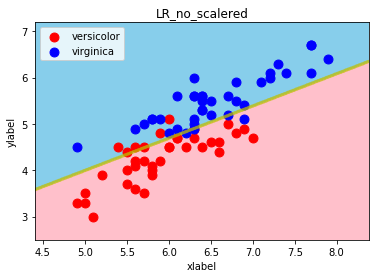

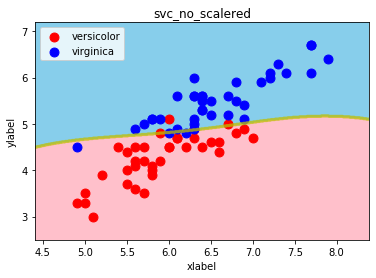

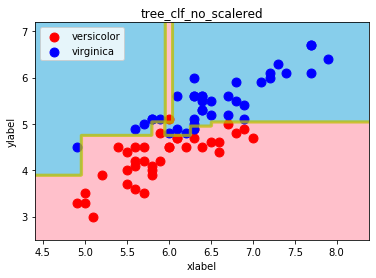

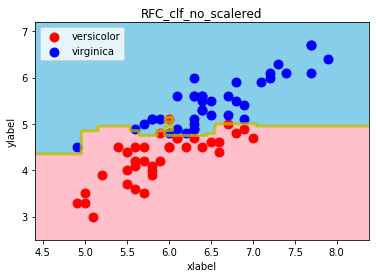

In [188]:
#領域の表示
decision_region(X_train, y_train, LR_no_scalered, step=0.01, title='LR_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train, y_train, svc_no_scalered, step=0.01, title='svc_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train, y_train, tree_clf_no_scalered, step=0.01, title='tree_clf_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])
decision_region(X_train, y_train, RFC_clf_no_scalered, step=0.01, title='RFC_clf_no_scalered', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

### 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [122]:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
df = pd.concat([X, y], axis=1)

df_selected = df.loc[:, ["sepal_length", "petal_length", "Species"]]

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "Species"], test_size=0.25, random_state=42)

print("X_train.shape : {}, X_test.shape : {}".format(X_train.shape, X_test.shape))

scaler = StandardScaler()

scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

X_train.shape : (112, 2), X_test.shape : (38, 2)


In [126]:
def decision_region_3dim(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    3値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 3)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['lightgreen', 'pink', 'skyblue']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))　#グラフの予想したラベルの色を塗る
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)　　#等高線をかく。今回は3値分類なので等高線数は2
    for i, target in enumerate(set(y)):  #set()はリストを引数にして、重複した要素は取り除かれた、順番を持たない集合が返り値となる。
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
def evaluate_multi(y_true, y_pred, average='macro'):
    """
    多値分類の評価指標を計算する。
    """
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)
    confusion = confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

1-nn
<with standard scaling>
acc : 0.8947368421052632
precision : 0.8897435897435897
recall : 0.8863636363636364
f1 : 0.8838383838383838
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]


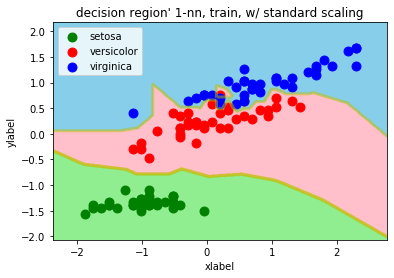

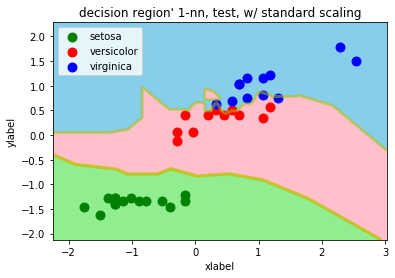

<without standard scaling>
acc : 0.8947368421052632
precision : 0.8897435897435897
recall : 0.8863636363636364
f1 : 0.8838383838383838
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  3  9]]


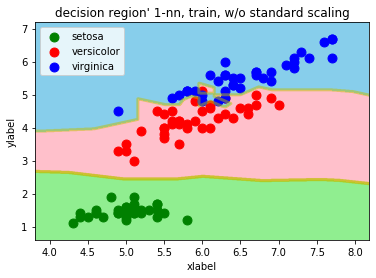

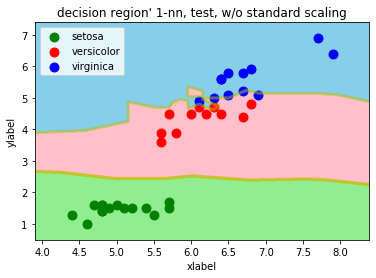

3-nn
<with standard scaling>
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


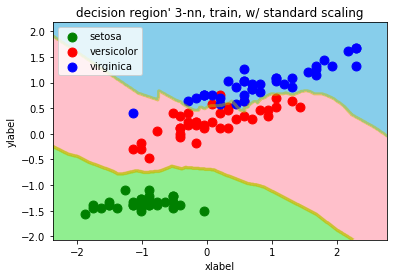

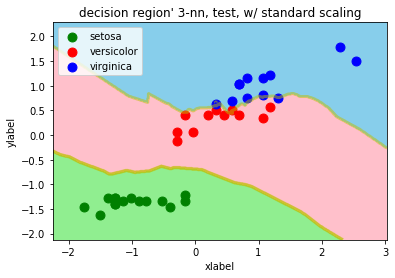

<without standard scaling>
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


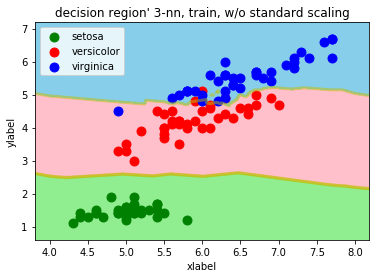

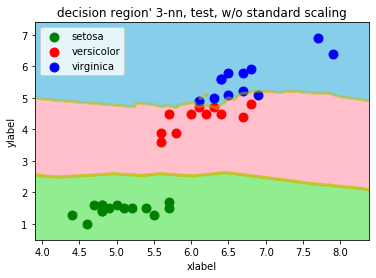

5-nn
<with standard scaling>
acc : 0.9473684210526315
precision : 0.9419191919191919
recall : 0.9419191919191919
f1 : 0.9419191919191919
confusion matrix 
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


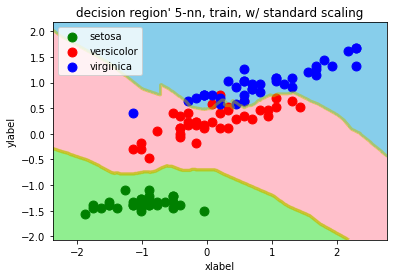

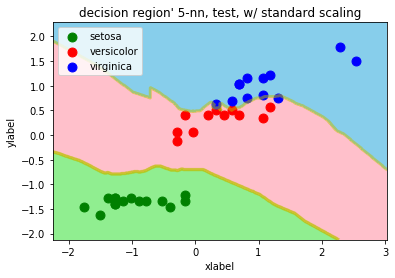

<without standard scaling>
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


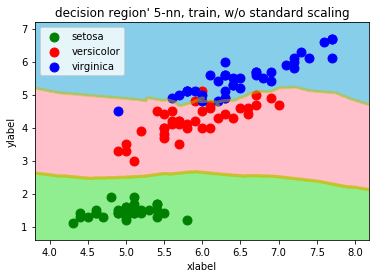

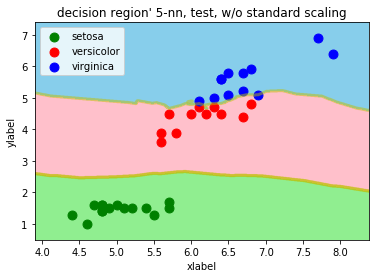

Logistic Regression
<with standard scaling>
acc : 0.868421052631579
precision : 0.9019607843137255
recall : 0.8484848484848485
f1 : 0.8444895199459094
confusion matrix 
 [[15  0  0]
 [ 0  6  5]
 [ 0  0 12]]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


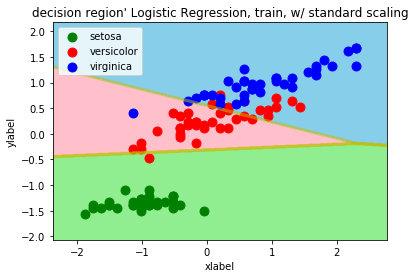

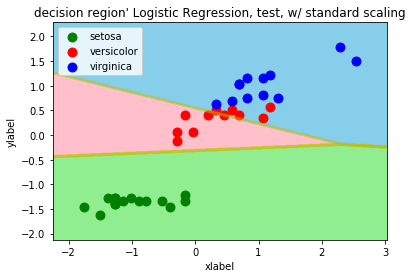

<without standard scaling>
acc : 0.9210526315789473
precision : 0.9153846153846154
recall : 0.9116161616161617
f1 : 0.9123809523809524
confusion matrix 
 [[15  0  0]
 [ 0  9  2]
 [ 0  1 11]]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


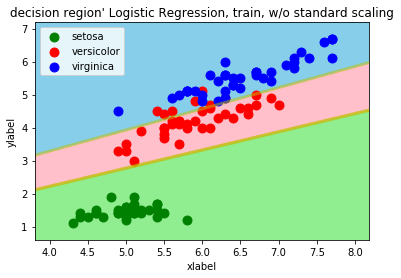

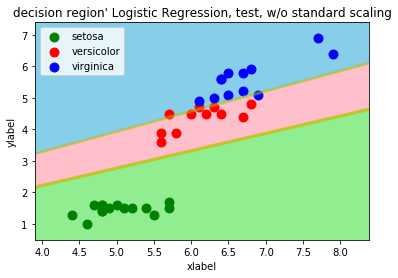

SVM
<with standard scaling>
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


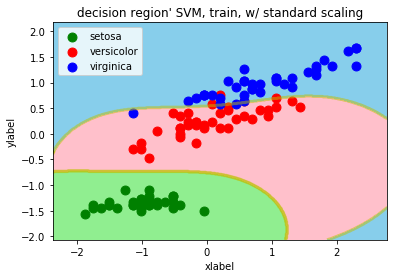

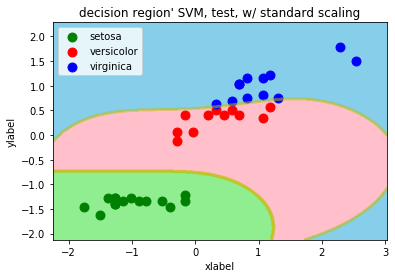

<without standard scaling>
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


/Users/mishibatoshihiro/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


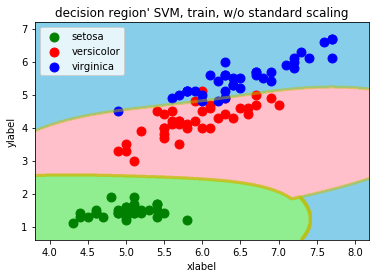

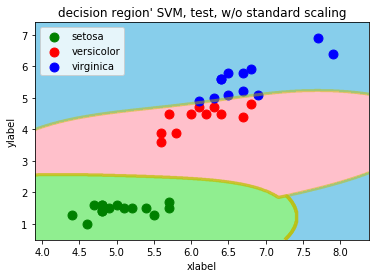

Decision Tree
<with standard scaling>
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


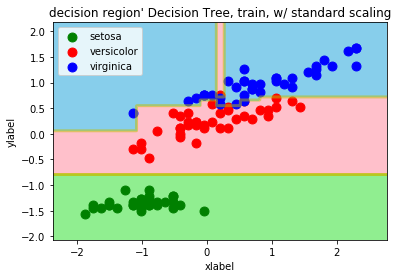

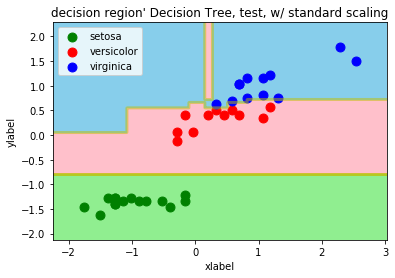

<without standard scaling>
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


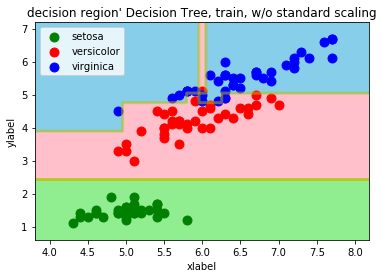

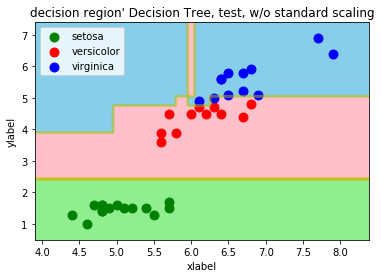

Random Forest
<with standard scaling>
acc : 0.9736842105263158
precision : 0.9722222222222222
recall : 0.9722222222222222
f1 : 0.9710144927536232
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


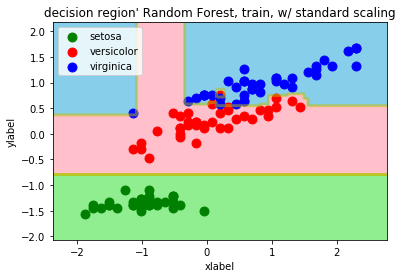

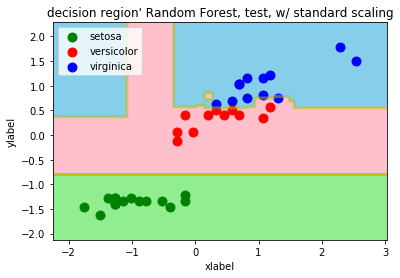

<without standard scaling>
acc : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
confusion matrix 
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


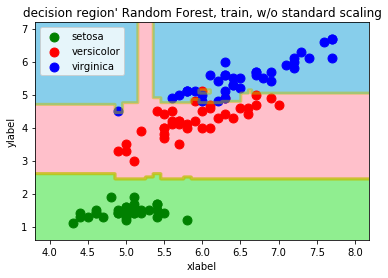

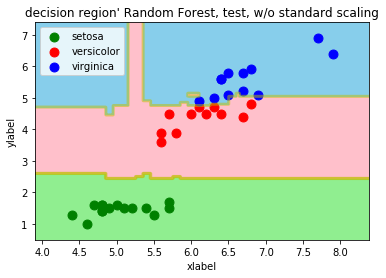

In [127]:
X_train_ndarray = np.array(X_train)
X_test_ndarray = np.array(X_test)

models = [model_1_nn, model_3_nn, model_5_nn, LR, svc, tree_clf, RFC_clf]
model_names = ["1-nn", "3-nn", "5-nn", "Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
for model, model_name in zip(models, model_names):
    print(model_name)
    
    print("<with standard scaling>")
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate_multi(y_test, y_pred)))
    decision_region_3dim(X_train_transformed, y_train, model, title="decision region' {}, {}, w/ standard scaling".format(model_name, "train"))
    decision_region_3dim(X_test_transformed, y_test, model, title="decision region' {}, {}, w/ standard scaling".format(model_name, "test"))
    
    print("<without standard scaling>")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate_multi(y_test, y_pred)))
    decision_region_3dim(X_train_ndarray, y_train, model, title="decision region' {}, {}, w/o standard scaling".format(model_name, "train"))
    decision_region_3dim(X_test_ndarray, y_test, model, title="decision region' {}, {}, w/o standard scaling".format(model_name, "test"))